In [1]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ttbar_1_30ll_test.csv')

,toppx,toppy,toppz,topmass,bpx,bpy,bpz,bmass,l+px,l+py,...,j_2px,j_2py,j_2pz,j_2mass,l_2px,l_2py,l_2pz,l_2mass,mex,mey
0,-4.06162,-54.6371,594.882,172.993,61.7480,-39.4545,185.644000,4.70019,-59.72640,-5.49872,...,35.98620,-22.8546,112.5420,5.06888,-51.96460,-13.8786,-57.7951,-9.536740e-07,67.1718,-35.92530
1,-38.36740,11.5361,-352.398,171.558,-24.3156,63.5997,-213.020000,4.70024,-24.53280,11.64510,...,-24.73260,64.5571,-216.9420,8.16319,-24.91900,11.8284,-17.3064,1.060000e-01,75.3727,-54.79940
2,13.70050,360.1640,527.022,172.230,47.5074,135.9710,116.103000,4.69990,-34.09130,197.11400,...,41.88220,113.1990,96.9771,8.92137,-23.87200,-116.7420,268.0690,1.060000e-01,-32.3616,14.86840
3,-55.15070,37.8959,-141.676,173.480,-19.3091,62.7090,-0.404925,4.69999,-59.64250,-13.21540,...,-7.48992,45.8222,-199.8410,6.41067,-60.90670,-13.4955,-77.4023,1.060000e-01,64.2186,3.97436
4,102.41900,-52.4251,230.311,171.413,110.4990,-12.0598,166.082000,4.70016,2.14025,-19.91420,...,-25.72660,-22.5612,157.7780,7.69718,2.21727,-20.6308,82.3037,1.060000e-01,-27.8684,110.49200


In [9]:
def get_totalenerge(df, particle_name):
    df['invariance'] = df.apply(lambda row: (row[particle_name+'_1']+row[particle_name+'_2'])**2 - (row[particle_name+'_px_1']+row[particle_name+'_px_2'])**2 - (row[particle_name+'_py_1']+row[particle_name+'_py_2'])**2 - (row[particle_name+'_pz_1']+row[particle_name+'_pz_2'])**2, axis=1)
    return df

top -> b (jet ? ))+ l+ + nu 
top~ -> b~ (jet ?) + l- + nubar



j1 j2 l1 l2, mex (missing enery sum of x direction ), mey (missing enery sum of y direction) 


total(j?) + total(l?) + mey + mex : -> top_mass, anti_top_mass

nu1_px nu1_py nu1_pz 

nu2_px nu2_py nu2_pz

-> top_mass, anti_top_mass



Index(['toppx', 'toppy', 'toppz', 'topmass', 'bpx', 'bpy', 'bpz', 'bmass',
       'l+px', 'l+py', 'l+pz', 'l+mass', 'nu_lpx', 'nu_lpy', 'nu_lpz',
       'nu_lmass', 'top~px', 'top~py', 'top~pz', 'top~mass', 'b~px', 'b~py',
       'b~pz', 'b~mass', 'l-px', 'l-py', 'l-pz', 'l-mass', 'nu_l~px',
       'nu_l~py', 'nu_l~pz', 'nu_l~mass', 'j_1px', 'j_1py', 'j_1pz', 'j_1mass',
       'l_1px', 'l_1py', 'l_1pz', 'l_1mass', 'j_2px', 'j_2py', 'j_2pz',
       'j_2mass', 'l_2px', 'l_2py', 'l_2pz', 'l_2mass', 'mex', 'mey'],
      dtype='object')

In [29]:
df['top_ps'] = df['toppx']*df['toppx'] + df['toppy']*df['toppy'] + df['toppz']*df['toppz']
df['top~_ps'] = df['top~px']*df['top~px'] + df['top~py']*df['top~py'] + df['top~pz']*df['top~pz']
df['top_ms'] = df['topmass']*df['topmass'] + df['top_ps']
df['top~_ms'] = df['top~mass']*df['top~mass'] + df['top~_ps']

In [30]:
df['total']= df['top_ms'] + df['top~_ms']

<Axes: >

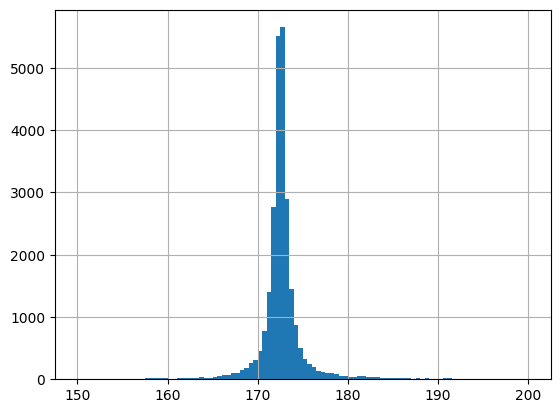

In [6]:
# draw the histogram of top_ms
df['topmass'].hist(bins=100, range=(150, 200))